<a href="https://colab.research.google.com/github/kenlo94/Affordable_Housing_2023/blob/rob_data_analytics/Sonoma%26Stanislaus_County.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SONOMA COUNTY**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import io

RealData_df = pd.read_csv(io.BytesIO(uploaded['Sonoma County.csv']), index_col='Dates',parse_dates=True)
print(RealData_df)

Saving Sonoma County.csv to Sonoma County.csv
            Sonoma County
Dates                    
2000-01-31         276706
2000-02-29         281799
2000-03-31         284108
2000-04-30         289529
2000-05-31         292721
...                   ...
2021-12-31         777986
2022-01-31         778514
2022-02-28         784929
2022-03-31         801455
2022-04-30         818383

[268 rows x 1 columns]


In [ ]:
RealData_df = RealData_df.dropna()
RealData_df

,Sonoma County
Dates,
2000-01-31,276706
2000-02-29,281799
2000-03-31,284108
2000-04-30,289529
2000-05-31,292721
...,...
2021-12-31,777986
2022-01-31,778514
2022-02-28,784929


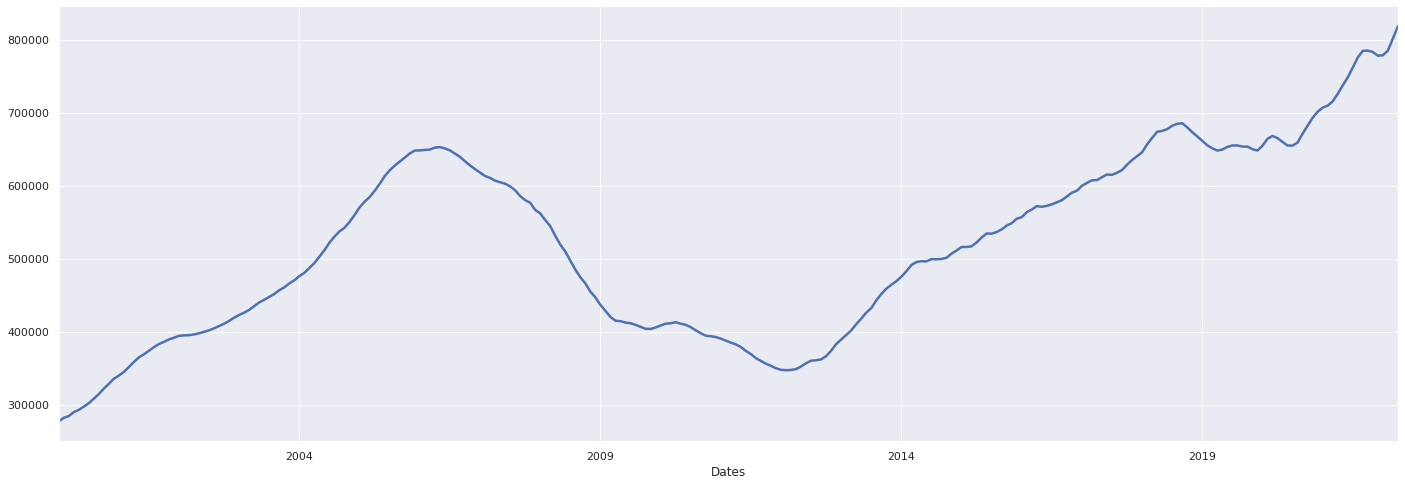

In [ ]:
import seaborn as sns

sns.set(rc={'figure.figsize':(24, 8)})
RealData_df['Sonoma County'].plot(linewidth=2.5);
#RealData_df.plot

In [ ]:
len(RealData_df)

268

In [ ]:
DATOS = RealData_df['Sonoma County'].values

# Primero dividamos los sets entre train y test
# En este caso la partición no puede ser aleatoria
# (se debe preservar el orden de la secuencia)
TRAIN_SIZE = 0.85
idx = round(len(DATOS)*TRAIN_SIZE)
datos_train = DATOS[0:idx]
datos_test = DATOS[idx:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
scaler = MinMaxScaler()

scaler = MinMaxScaler(feature_range=(-1,1))
datos_train_s = scaler.fit_transform(datos_train.reshape(-1,1))
datos_test_s = scaler.transform(datos_test.reshape(-1,1))

LONG_SEC = 2

X_train, Y_train = [], []
for i in range(len(datos_train_s)-LONG_SEC):
  X_train.append(datos_train_s[i:i+LONG_SEC])
  Y_train.append(datos_train_s[i+LONG_SEC])

X_test, Y_test = [], []
for i in range(len(datos_test_s)-LONG_SEC):
  X_test.append(datos_test_s[i:i+LONG_SEC])
  Y_test.append(datos_test_s[i+LONG_SEC])

X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_test, Y_test = np.array(X_test), np.array(Y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [ ]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(226, 2, 1) (226, 1)
(38, 2, 1) (38, 1)


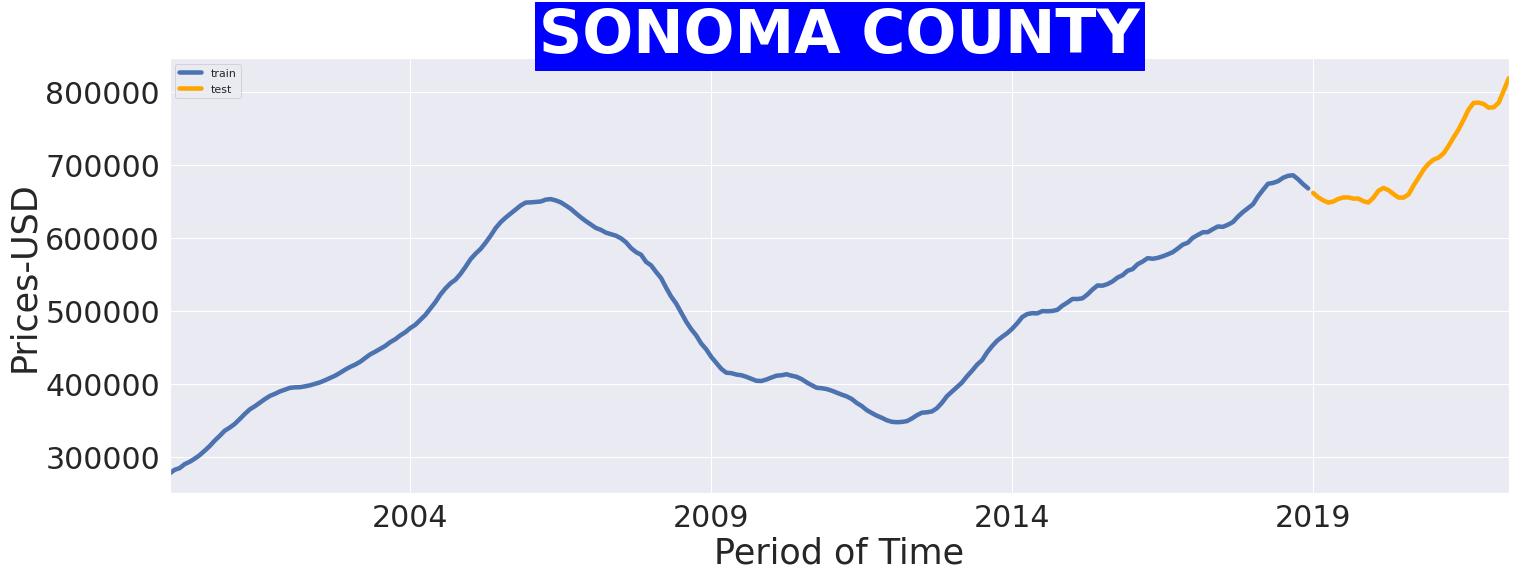

In [ ]:
RealData_df['Sonoma County'].iloc[0:idx].plot(linewidth=4.5, label='train', figsize=(24,8))
RealData_df['Sonoma County'].iloc[idx:].plot(linewidth=4.5, color='orange', label='test')
plt.title("SONOMA COUNTY", fontsize=60,backgroundcolor='blue', color="white", fontweight="bold")
plt.xlabel('Period of Time', fontsize=35)
plt.ylabel('Prices-USD', fontsize=35)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend();

In [ ]:
# Creating the LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import RMSprop, Adam
import tensorflow as tf

# Seed for Random Generators
SEED = 88
tf.random.set_seed(SEED)
np.random.seed(SEED)

# El modelo
N_UNITS = 150
modelo = Sequential()
modelo.add(LSTM(N_UNITS, input_shape=(LONG_SEC,1)))
modelo.add(Dense(1))

In [ ]:
# Compilación y entrenamiento
optimizador = RMSprop(learning_rate=0.0005)
modelo.compile(optimizer=optimizador, loss='mse', metrics='mean_absolute_error')

# Entrenamiento
EPOCHS = 60
BATCH_SIZE = 5
modelo.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
           validation_data = (X_test, Y_test))

Epoch 1/60
46/46 [==============================] - 3s 18ms/step - loss: 0.1756 - mean_absolute_error: 0.3634 - val_loss: 0.3504 - val_mean_absolute_error: 0.5717
Epoch 2/60
46/46 [==============================] - 0s 6ms/step - loss: 0.0324 - mean_absolute_error: 0.1453 - val_loss: 0.0065 - val_mean_absolute_error: 0.0636
Epoch 3/60
46/46 [==============================] - 0s 6ms/step - loss: 0.0023 - mean_absolute_error: 0.0392 - val_loss: 0.0026 - val_mean_absolute_error: 0.0435
Epoch 4/60
46/46 [==============================] - 0s 6ms/step - loss: 0.0020 - mean_absolute_error: 0.0357 - val_loss: 0.0029 - val_mean_absolute_error: 0.0456
Epoch 5/60
46/46 [==============================] - 0s 6ms/step - loss: 0.0020 - mean_absolute_error: 0.0363 - val_loss: 0.0044 - val_mean_absolute_error: 0.0523
Epoch 6/60
46/46 [==============================] - 0s 6ms/step - loss: 0.0020 - mean_absolute_error: 0.0355 - val_loss: 0.0028 - val_mean_absolute_error: 0.0463
Epoch 7/60
46/46 [=========

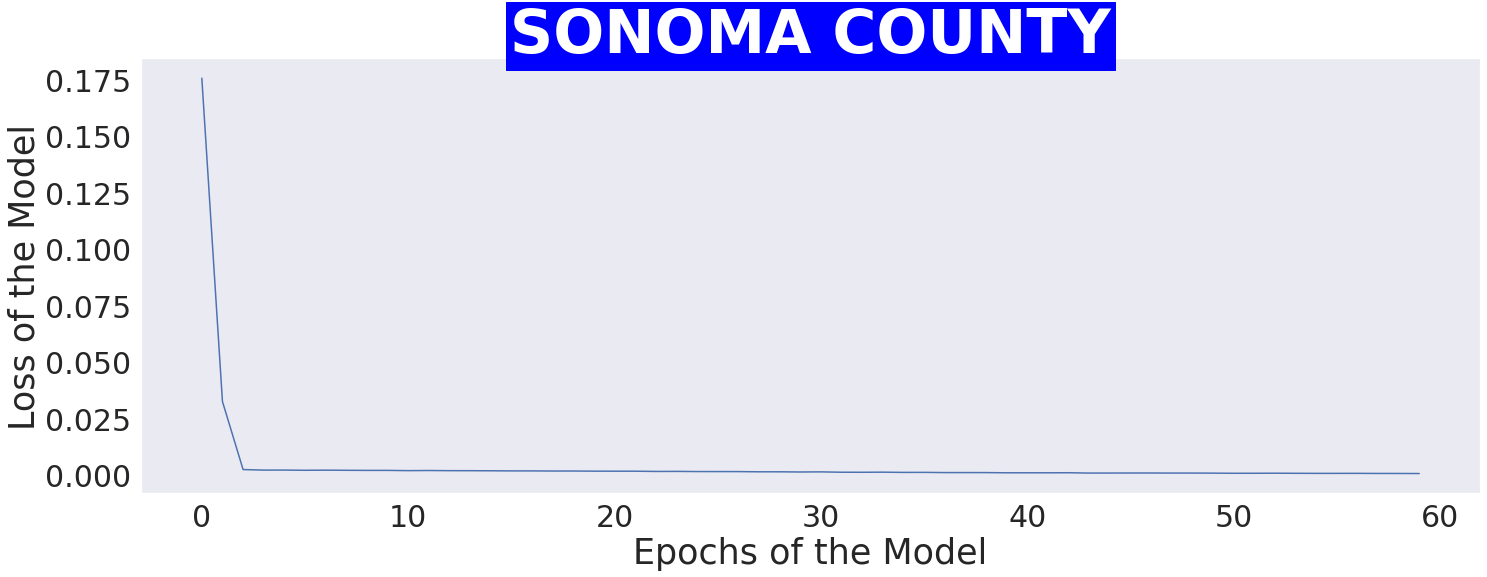

In [ ]:
from matplotlib import pyplot as plt

loss_per_epoch = modelo.history.history['loss']
plt.figure(figsize=(24,8))
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('Epochs of the Model', fontsize=35)
plt.ylabel('Loss of the Model', fontsize=35)
plt.title("SONOMA COUNTY", fontsize=60,backgroundcolor='blue', color="white", fontweight="bold")
plt.grid()

In [ ]:
# Print the Prediction in a Array (1 sample, single-step)
y_pred = [y[0] for y in modelo.predict(X_test)]
y_pred = np.array(y_pred)
y_pred

array([0.8738468 , 0.8566217 , 0.8421411 , 0.8574677 , 0.879245  ,
       0.8868077 , 0.8837361 , 0.8729447 , 0.87548226, 0.8512202 ,
       0.8447421 , 0.892966  , 0.9458323 , 0.95609987, 0.9296    ,
       0.89909285, 0.874325  , 0.8821169 , 0.91120213, 0.9857035 ,
       1.0377643 , 1.0934412 , 1.1318066 , 1.1559893 , 1.1664954 ,
       1.2008736 , 1.2588636 , 1.3202095 , 1.3758271 , 1.447051  ,
       1.5200152 , 1.5620704 , 1.5568444 , 1.5453424 , 1.5161841 ,
       1.5234122 , 1.5619006 , 1.655828  ], dtype=float32)

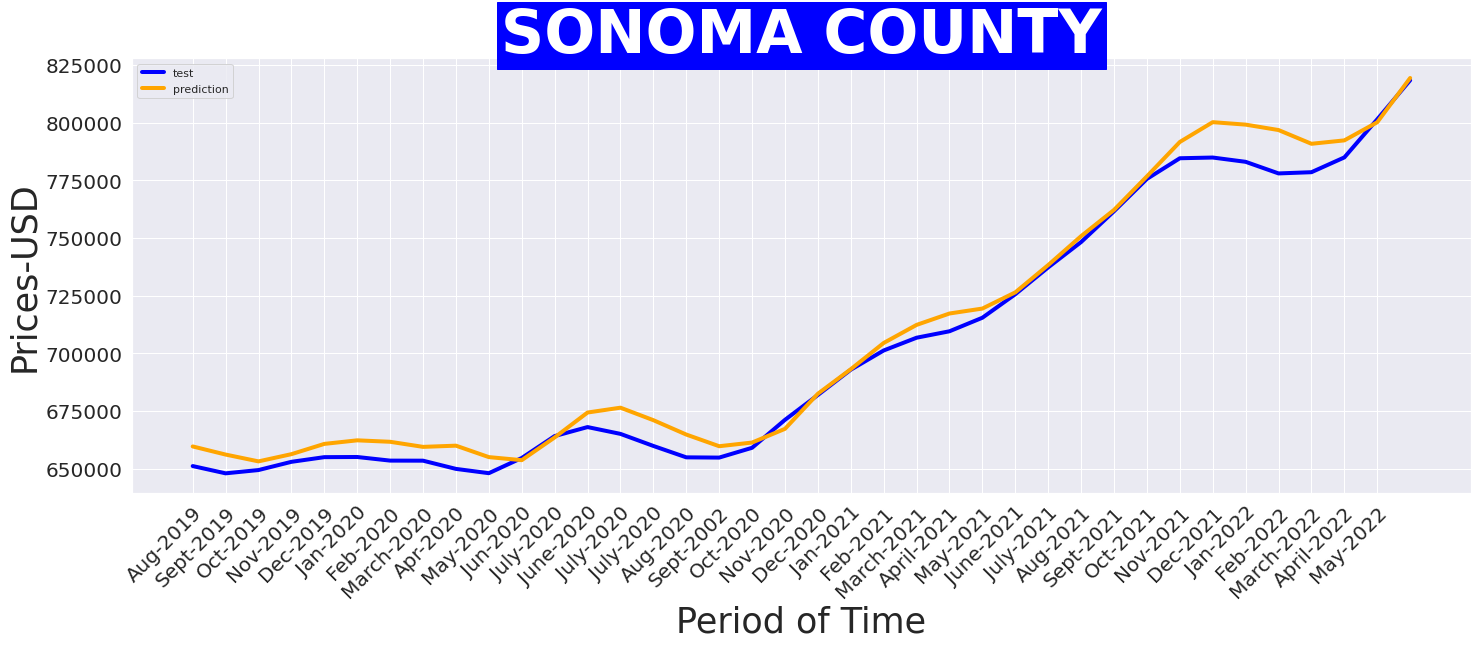

In [ ]:
# Predictions to the Original Scale
import numpy as np
y_test_inv = scaler.inverse_transform(Y_test)
y_pred_inv = y_pred.reshape(-1,1)
y_pred_inv = scaler.inverse_transform(y_pred_inv)

labels = ['Aug-2019', 'Sept-2019', 'Oct-2019', 'Nov-2019', 'Dec-2019', 'Jan-2020','Feb-2020','March-2020', 'Apr-2020', 'May-2020', 'Jun-2020', 'July-2020', 'June-2020', 'July-2020', 'July-2020', 'Aug-2020',
          'Sept-2002', 'Oct-2020', 'Nov-2020',	'Dec-2020',	'Jan-2021',	'Feb-2021',	'March-2021',	'April-2021',	'May-2021',	'June-2021',	'July-2021',	'Aug-2021',	'Sept-2021',	'Oct-2021',	'Nov-2021',	'Dec-2021',	'Jan-2022','Feb-2022',	'March-2022',	'April-2022',	'May-2022']
x = np.arange(len(labels))  # the label locations
fig, ax = plt.subplots(figsize=(24,8))
plt.plot(y_test_inv[0:38],color='blue',label='test', linewidth=4.0)
plt.plot(y_pred_inv[0:38],color='orange',label='prediction', linewidth=4.0)
ax.set_xticks(x)
ax.set_xticklabels(
    labels, 
    rotation=45, 
    ha="right",  
    rotation_mode="anchor") 
ax.legend()

plt.xlabel('Period of Time', fontsize=35)
plt.ylabel('Prices-USD', fontsize=35)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("SONOMA COUNTY", fontsize=60,backgroundcolor='blue', color="white", fontweight="bold")

plt.legend();

No handles with labels found to put in legend.


Text(0.5, 1.0, 'SONOMA COUNTY')

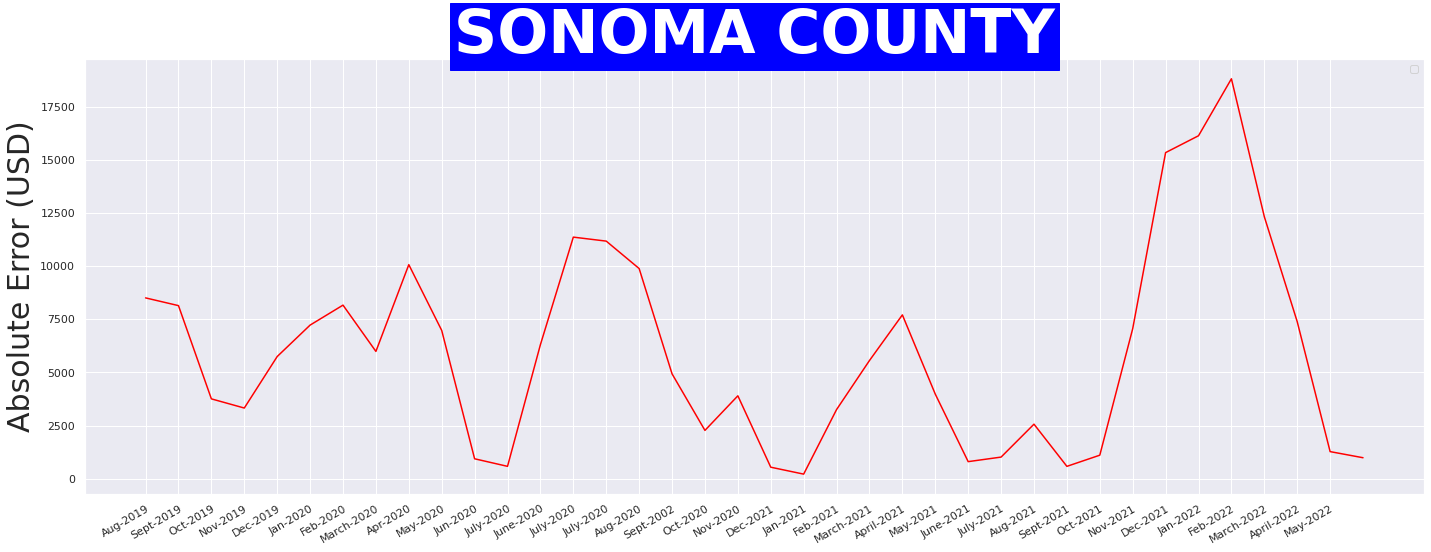

In [ ]:
# Drawing the Absolute Error as USD
labels = ['Aug-2019', 'Sept-2019', 'Oct-2019', 'Nov-2019', 'Dec-2019', 'Jan-2020','Feb-2020','March-2020', 'Apr-2020', 'May-2020', 'Jun-2020', 'July-2020', 'June-2020', 'July-2020', 'July-2020', 'Aug-2020',
          'Sept-2002', 'Oct-2020', 'Nov-2020',	'Dec-2021',	'Jan-2021',	'Feb-2021',	'March-2021',	'April-2021',	'May-2021',	'June-2021',	'July-2021',	'Aug-2021',	'Sept-2021',	'Oct-2021',	'Nov-2021',	'Dec-2021',	'Jan-2022',
          'Feb-2022',	'March-2022',	'April-2022',	'May-2022']
x = np.arange(len(labels))  # the label locations
fig, ax = plt.subplots(figsize=(24,8))
plt.plot(np.abs(y_test_inv-y_pred_inv), color='red')
ax.set_xticks(x)
ax.set_xticklabels(
    labels, 
    rotation=30, 
    ha="right",  
    rotation_mode="anchor") 
ax.legend()
plt.ylabel('Absolute Error (USD)', fontsize=30)
plt.title("SONOMA COUNTY", fontsize=60,backgroundcolor='blue', color="white", fontweight="bold")

#plt.grid()

In [ ]:
y_pred_inv

array([[659589.1 ],
       [656069.5 ],
       [653110.7 ],
       [656242.4 ],
       [660692.1 ],
       [662237.44],
       [661609.8 ],
       [659404.75],
       [659923.3 ],
       [654965.8 ],
       [653642.1 ],
       [663495.75],
       [674297.9 ],
       [676395.9 ],
       [670981.2 ],
       [664747.6 ],
       [659686.8 ],
       [661278.94],
       [667221.94],
       [682444.8 ],
       [693082.4 ],
       [704458.9 ],
       [712298.06],
       [717239.25],
       [719386.  ],
       [726410.5 ],
       [738259.56],
       [750794.44],
       [762158.75],
       [776711.94],
       [791620.7 ],
       [800213.8 ],
       [799146.  ],
       [796795.8 ],
       [790837.9 ],
       [792314.8 ],
       [800179.1 ],
       [819371.3 ]], dtype=float32)

# **STANISLAUS COUNTY**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import io

RealData_df = pd.read_csv(io.BytesIO(uploaded['Stanislaus County.csv']), index_col='Dates',parse_dates=True)
print(RealData_df)

Saving Stanislaus County.csv to Stanislaus County.csv
            Stanislaus County
Dates                        
2000-01-31           148886.0
2000-02-29           149243.0
2000-03-31           149844.0
2000-04-30           149574.0
2000-05-31           149406.0
...                       ...
NaT                       NaN
NaT                       NaN
NaT                       NaN
NaT                       NaN
NaT                       NaN

[461 rows x 1 columns]


In [ ]:
RealData_df = RealData_df.dropna()
RealData_df

,Stanislaus County
Dates,
2000-01-31,148886.0
2000-02-29,149243.0
2000-03-31,149844.0
2000-04-30,149574.0
2000-05-31,149406.0
...,...
2021-12-31,441347.0
2022-01-31,444172.0
2022-02-28,451855.0


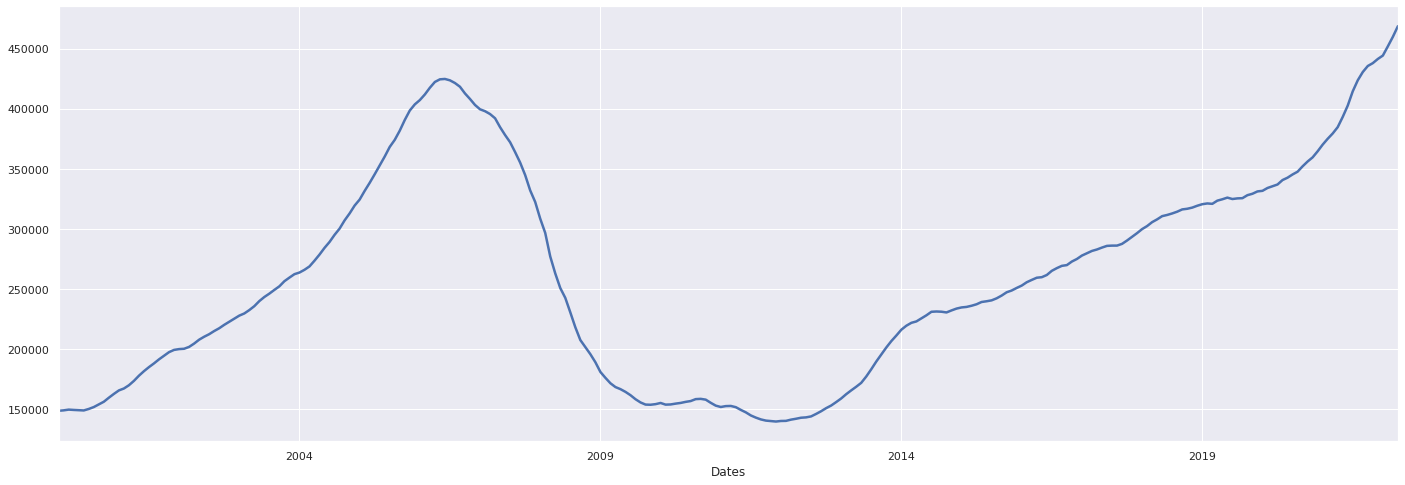

In [ ]:
import seaborn as sns

sns.set(rc={'figure.figsize':(24, 8)})
RealData_df['Stanislaus County'].plot(linewidth=2.5);
#RealData_df.plot

In [ ]:
len(RealData_df)

268

In [ ]:
DATOS = RealData_df['Stanislaus County'].values

# Primero dividamos los sets entre train y test
# En este caso la partición no puede ser aleatoria
# (se debe preservar el orden de la secuencia)
TRAIN_SIZE = 0.85
idx = round(len(DATOS)*TRAIN_SIZE)
datos_train = DATOS[0:idx]
datos_test = DATOS[idx:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler = MinMaxScaler(feature_range=(-1,1))
datos_train_s = scaler.fit_transform(datos_train.reshape(-1,1))
datos_test_s = scaler.transform(datos_test.reshape(-1,1))

LONG_SEC = 2

X_train, Y_train = [], []
for i in range(len(datos_train_s)-LONG_SEC):
  X_train.append(datos_train_s[i:i+LONG_SEC])
  Y_train.append(datos_train_s[i+LONG_SEC])

X_test, Y_test = [], []
for i in range(len(datos_test_s)-LONG_SEC):
  X_test.append(datos_test_s[i:i+LONG_SEC])
  Y_test.append(datos_test_s[i+LONG_SEC])

X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_test, Y_test = np.array(X_test), np.array(Y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [ ]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(226, 2, 1) (226, 1)
(38, 2, 1) (38, 1)


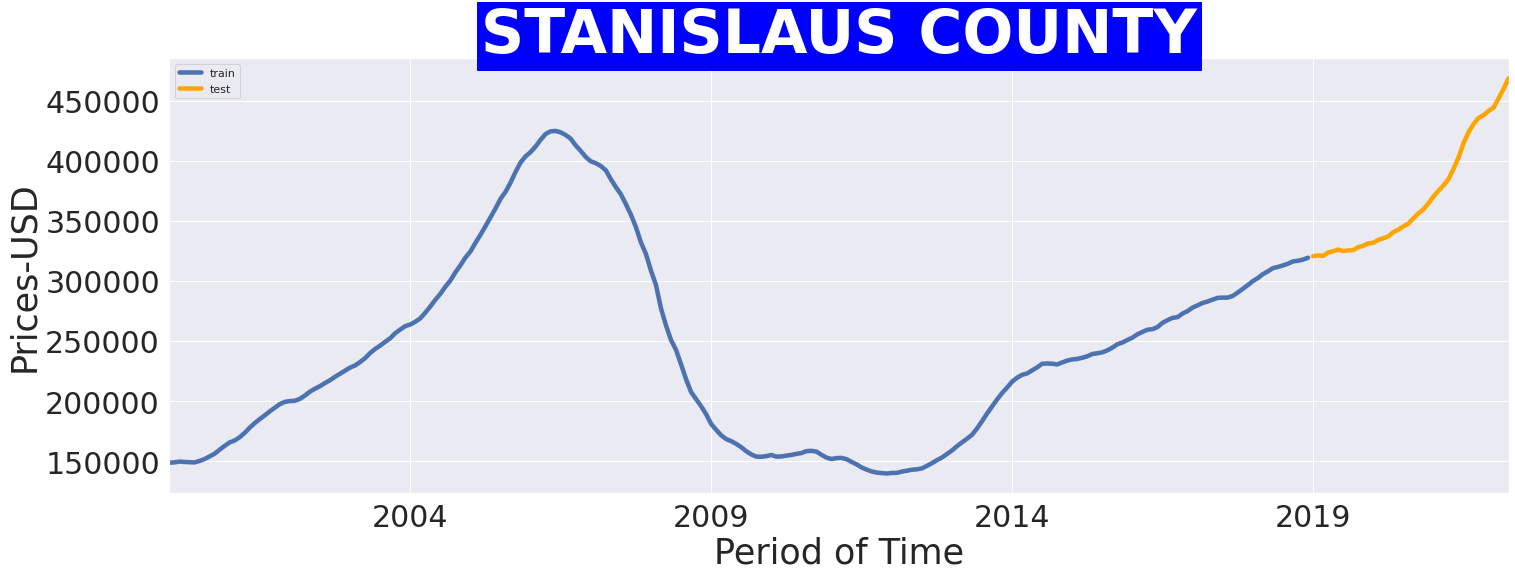

In [ ]:
RealData_df['Stanislaus County'].iloc[0:idx].plot(linewidth=4.5, label='train', figsize=(24,8))
RealData_df['Stanislaus County'].iloc[idx:].plot(linewidth=4.5, color='orange', label='test')
plt.title("STANISLAUS COUNTY", fontsize=60,backgroundcolor='blue', color="white", fontweight="bold")
plt.xlabel('Period of Time', fontsize=35)
plt.ylabel('Prices-USD', fontsize=35)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend();

In [ ]:
# Creating the LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import RMSprop, Adam
import tensorflow as tf

# Seed for Random Generators
SEED = 88
tf.random.set_seed(SEED)
np.random.seed(SEED)

# El modelo
N_UNITS = 150
modelo = Sequential()
modelo.add(LSTM(N_UNITS, input_shape=(LONG_SEC,1)))
modelo.add(Dense(1))

In [ ]:
# Compilación y entrenamiento
optimizador = RMSprop(learning_rate=0.0005)
modelo.compile(optimizer=optimizador, loss='mse', metrics='mean_absolute_error')

# Entrenamiento
EPOCHS = 60
BATCH_SIZE = 5
modelo.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
           validation_data = (X_test, Y_test))

Epoch 1/60
46/46 [==============================] - 3s 17ms/step - loss: 0.2225 - mean_absolute_error: 0.3891 - val_loss: 0.3371 - val_mean_absolute_error: 0.5439
Epoch 2/60
46/46 [==============================] - 0s 5ms/step - loss: 0.0465 - mean_absolute_error: 0.1643 - val_loss: 0.0524 - val_mean_absolute_error: 0.2072
Epoch 3/60
46/46 [==============================] - 0s 5ms/step - loss: 0.0049 - mean_absolute_error: 0.0472 - val_loss: 0.0062 - val_mean_absolute_error: 0.0559
Epoch 4/60
46/46 [==============================] - 0s 5ms/step - loss: 0.0031 - mean_absolute_error: 0.0361 - val_loss: 0.0054 - val_mean_absolute_error: 0.0524
Epoch 5/60
46/46 [==============================] - 0s 6ms/step - loss: 0.0031 - mean_absolute_error: 0.0373 - val_loss: 0.0052 - val_mean_absolute_error: 0.0521
Epoch 6/60
46/46 [==============================] - 0s 6ms/step - loss: 0.0030 - mean_absolute_error: 0.0369 - val_loss: 0.0016 - val_mean_absolute_error: 0.0308
Epoch 7/60
46/46 [=========

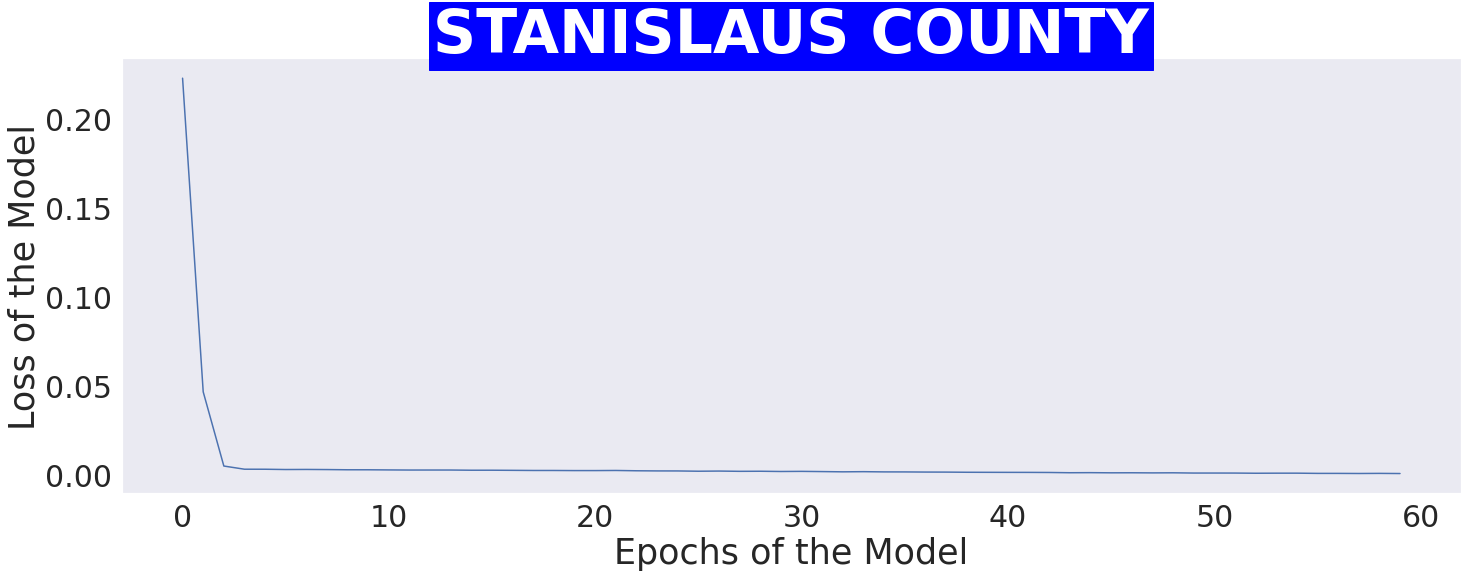

In [ ]:
from matplotlib import pyplot as plt

loss_per_epoch = modelo.history.history['loss']
plt.figure(figsize=(24,8))
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('Epochs of the Model', fontsize=35)
plt.ylabel('Loss of the Model', fontsize=35)
plt.title("STANISLAUS COUNTY", fontsize=60,backgroundcolor='blue', color="white", fontweight="bold")
plt.grid()

In [ ]:
# Print the Prediction in a Array (1 sample, single-step)
y_pred = [y[0] for y in modelo.predict(X_test)]
y_pred = np.array(y_pred)
y_pred

array([0.28535   , 0.28069052, 0.3068032 , 0.3112523 , 0.32164934,
       0.30696753, 0.31495658, 0.315316  , 0.33886483, 0.34402356,
       0.359745  , 0.35968918, 0.38117388, 0.38926467, 0.39977092,
       0.43180284, 0.44169843, 0.4627908 , 0.47846785, 0.51612985,
       0.5440399 , 0.5677784 , 0.6085962 , 0.65043145, 0.68472165,
       0.71630204, 0.75776494, 0.8289398 , 0.9022801 , 0.99853057,
       1.0641913 , 1.1138743 , 1.1504604 , 1.164957  , 1.1948209 ,
       1.2167089 , 1.2871424 , 1.3526587 ], dtype=float32)

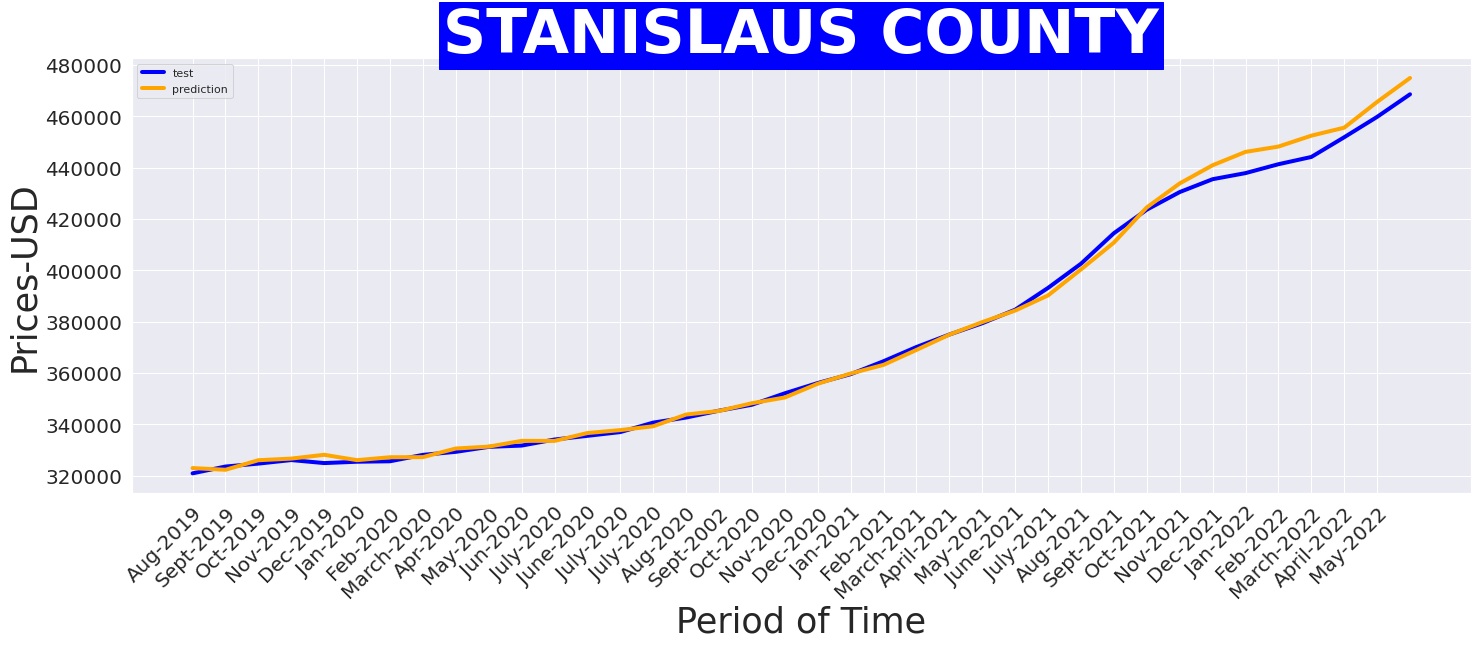

In [ ]:
# Predictions to the Original Scale
import numpy as np
y_test_inv = scaler.inverse_transform(Y_test)
y_pred_inv = y_pred.reshape(-1,1)
y_pred_inv = scaler.inverse_transform(y_pred_inv)

labels = ['Aug-2019', 'Sept-2019', 'Oct-2019', 'Nov-2019', 'Dec-2019', 'Jan-2020','Feb-2020','March-2020', 'Apr-2020', 'May-2020', 'Jun-2020', 'July-2020', 'June-2020', 'July-2020', 'July-2020', 'Aug-2020',
          'Sept-2002', 'Oct-2020', 'Nov-2020',	'Dec-2020',	'Jan-2021',	'Feb-2021',	'March-2021',	'April-2021',	'May-2021',	'June-2021',	'July-2021',	'Aug-2021',	'Sept-2021',	'Oct-2021',	'Nov-2021',	'Dec-2021',	'Jan-2022','Feb-2022',	'March-2022',	'April-2022',	'May-2022']
x = np.arange(len(labels))  # the label locations
fig, ax = plt.subplots(figsize=(24,8))
plt.plot(y_test_inv[0:38],color='blue',label='test', linewidth=4.0)
plt.plot(y_pred_inv[0:38],color='orange',label='prediction', linewidth=4.0)
ax.set_xticks(x)
ax.set_xticklabels(
    labels, 
    rotation=45, 
    ha="right",  
    rotation_mode="anchor") 
ax.legend()

plt.title("STANISLAUS COUNTY", fontsize=60,backgroundcolor='blue', color="white", fontweight="bold")
plt.xlabel('Period of Time', fontsize=35)
plt.ylabel('Prices-USD', fontsize=35)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend();

No handles with labels found to put in legend.


Text(0.5, 1.0, 'STANISLAUS COUNTY')

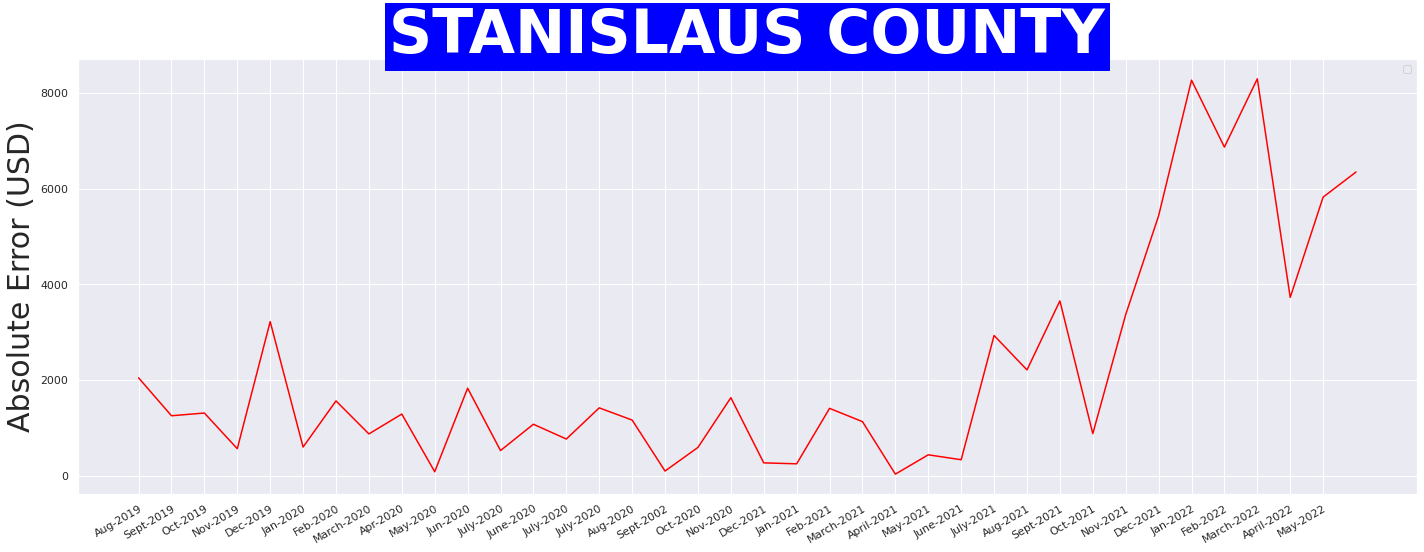

In [ ]:
# Drawing the Absolute Error as USD
labels = ['Aug-2019', 'Sept-2019', 'Oct-2019', 'Nov-2019', 'Dec-2019', 'Jan-2020','Feb-2020','March-2020', 'Apr-2020', 'May-2020', 'Jun-2020', 'July-2020', 'June-2020', 'July-2020', 'July-2020', 'Aug-2020',
          'Sept-2002', 'Oct-2020', 'Nov-2020',	'Dec-2021',	'Jan-2021',	'Feb-2021',	'March-2021',	'April-2021',	'May-2021',	'June-2021',	'July-2021',	'Aug-2021',	'Sept-2021',	'Oct-2021',	'Nov-2021',	'Dec-2021',	'Jan-2022',
          'Feb-2022',	'March-2022',	'April-2022',	'May-2022']
x = np.arange(len(labels))  # the label locations
fig, ax = plt.subplots(figsize=(24,8))
plt.plot(np.abs(y_test_inv-y_pred_inv), color='red')
ax.set_xticks(x)
ax.set_xticklabels(
    labels, 
    rotation=30, 
    ha="right",  
    rotation_mode="anchor") 
ax.legend()
plt.ylabel('Absolute Error (USD)', fontsize=30)
plt.title("STANISLAUS COUNTY", fontsize=60,backgroundcolor='blue', color="white", fontweight="bold")
#plt.grid()

In [ ]:
y_pred_inv

array([[322964.75],
       [322301.28],
       [326019.56],
       [326653.1 ],
       [328133.62],
       [326043.  ],
       [327180.6 ],
       [327231.78],
       [330585.  ],
       [331319.56],
       [333558.2 ],
       [333550.25],
       [336609.56],
       [337761.66],
       [339257.66],
       [343818.84],
       [345227.94],
       [348231.38],
       [350463.7 ],
       [355826.56],
       [359800.78],
       [363181.03],
       [368993.25],
       [374950.38],
       [379833.1 ],
       [384329.97],
       [390234.06],
       [400368.97],
       [410812.25],
       [424517.75],
       [433867.5 ],
       [440942.06],
       [446151.72],
       [448216.  ],
       [452468.44],
       [455585.16],
       [465614.5 ],
       [474943.7 ]], dtype=float32)